In [693]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

In [694]:
# Loading file to pandas dataframe

data = 'ASM01.csv'
df = pd.read_csv(data)

#Visualizing 
df

,STATISTIC Label,Month,Direction,Mode,UNIT,VALUE
0,Air and Sea Travel,2010 January,Arrivals,All modes of transport,Thousand,773.2
1,Air and Sea Travel,2010 January,Arrivals,Air,Thousand,728.4
2,Air and Sea Travel,2010 January,Arrivals,Sea,Thousand,44.8
3,Air and Sea Travel,2010 January,Departures,All modes of transport,Thousand,791.7
4,Air and Sea Travel,2010 January,Departures,Air,Thousand,732.4
...,...,...,...,...,...,...
1009,Air and Sea Travel,2024 January,Arrivals,Air,Thousand,1271.3
1010,Air and Sea Travel,2024 January,Arrivals,Sea,Thousand,31.1
1011,Air and Sea Travel,2024 January,Departures,All modes of transport,Thousand,1281.7
1012,Air and Sea Travel,2024 January,Departures,Air,Thousand,1239.5


In [695]:
# Oberving the data type of each column

df.dtypes

STATISTIC Label     object
Month               object
Direction           object
Mode                object
UNIT                object
VALUE              float64
dtype: object

In [696]:
#Checking if the STATISTIC Label column has only one value

df['STATISTIC Label'].unique()

array(['Air and Sea Travel'], dtype=object)

In [697]:
#Checking if the UNIT column has only one value

df['UNIT'].unique()

array(['Thousand'], dtype=object)

In [698]:
# Removing columns STATISTIC Label and UNIT on axis 1 -> columns
df = df.drop(['STATISTIC Label', 'UNIT'], axis=1)
df

,Month,Direction,Mode,VALUE
0,2010 January,Arrivals,All modes of transport,773.2
1,2010 January,Arrivals,Air,728.4
2,2010 January,Arrivals,Sea,44.8
3,2010 January,Departures,All modes of transport,791.7
4,2010 January,Departures,Air,732.4
...,...,...,...,...
1009,2024 January,Arrivals,Air,1271.3
1010,2024 January,Arrivals,Sea,31.1
1011,2024 January,Departures,All modes of transport,1281.7
1012,2024 January,Departures,Air,1239.5


In [699]:
# Convert the 'Month' column to a datetime object with Year-Month format
df['Year-Month'] = pd.to_datetime(df['Month'], format='%Y %B').dt.strftime('%Y-%m')

# Removing column Month
df.drop(columns='Month', inplace=True)

df

,Direction,Mode,VALUE,Year-Month
0,Arrivals,All modes of transport,773.2,2010-01
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
3,Departures,All modes of transport,791.7,2010-01
4,Departures,Air,732.4,2010-01
...,...,...,...,...
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1011,Departures,All modes of transport,1281.7,2024-01
1012,Departures,Air,1239.5,2024-01


In [700]:
# Replacing "All modes of transport" to "Total" in the "Mode" column
df["Mode"] = df["Mode"].replace({"All modes of transport": "Total"})

df

,Direction,Mode,VALUE,Year-Month
0,Arrivals,Total,773.2,2010-01
1,Arrivals,Air,728.4,2010-01
2,Arrivals,Sea,44.8,2010-01
3,Departures,Total,791.7,2010-01
4,Departures,Air,732.4,2010-01
...,...,...,...,...
1009,Arrivals,Air,1271.3,2024-01
1010,Arrivals,Sea,31.1,2024-01
1011,Departures,Total,1281.7,2024-01
1012,Departures,Air,1239.5,2024-01


In [701]:
# Concatenating "Direction" and "Mode" columns with a separator and assigning it back to the DataFrame
df["Direction-Mode"] = df["Direction"] + " " + df["Mode"]

# Dropping the original "Direction" and "Mode" columns as they are now combined
df.drop(["Direction", "Mode"], axis=1, inplace=True)

df

,VALUE,Year-Month,Direction-Mode
0,773.2,2010-01,Arrivals Total
1,728.4,2010-01,Arrivals Air
2,44.8,2010-01,Arrivals Sea
3,791.7,2010-01,Departures Total
4,732.4,2010-01,Departures Air
...,...,...,...
1009,1271.3,2024-01,Arrivals Air
1010,31.1,2024-01,Arrivals Sea
1011,1281.7,2024-01,Departures Total
1012,1239.5,2024-01,Departures Air


In [702]:
# Organized all the Data in only 3 columns, but still with relevant categorical data on values
# also arranged in rows and columns  
df

,VALUE,Year-Month,Direction-Mode
0,773.2,2010-01,Arrivals Total
1,728.4,2010-01,Arrivals Air
2,44.8,2010-01,Arrivals Sea
3,791.7,2010-01,Departures Total
4,732.4,2010-01,Departures Air
...,...,...,...
1009,1271.3,2024-01,Arrivals Air
1010,31.1,2024-01,Arrivals Sea
1011,1281.7,2024-01,Departures Total
1012,1239.5,2024-01,Departures Air


In [703]:
# Pivoting the DataFrame creating new columns with 'VALUE' values
df_pivoted = df.pivot_table(index='Year-Month', columns='Direction-Mode', values='VALUE')

# Removing the label 'Direction-Mode' from the columns
df_pivoted.columns.name = None

#Year_Month start be index
df_pivoted

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
Year-Month,,,,,,
2010-01,728.4,44.8,773.2,732.4,59.3,791.7
2010-02,757.2,46.9,804.0,757.2,46.1,803.2
2010-03,906.6,83.3,989.8,919.6,81.5,1001.1
2010-04,735.8,168.7,904.5,709.5,172.5,882.0
2010-05,968.5,146.4,1114.9,977.9,132.9,1110.8
...,...,...,...,...,...,...
2023-09,1814.8,98.7,1913.5,1799.0,111.1,1910.1
2023-10,1742.1,76.5,1818.6,1752.1,77.6,1829.7
2023-11,1352.8,44.5,1397.4,1316.5,45.0,1361.5


In [704]:
# Oberving the data type of each column

df_pivoted.dtypes

Arrivals Air        float64
Arrivals Sea        float64
Arrivals Total      float64
Departures Air      float64
Departures Sea      float64
Departures Total    float64
dtype: object

In [705]:
# Dataframe cleaned and prepared to perform summarization
# Now All data is on numeric format
# Lets plot the reorganized data to see what can visualize


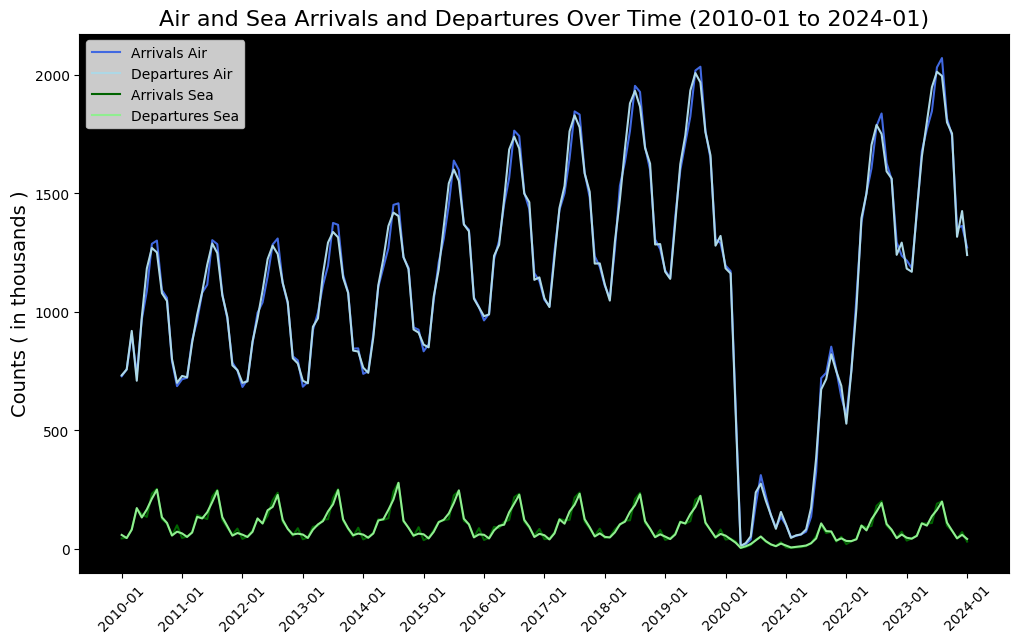

In [706]:
#importing ticker to adjust number of months on axis Y
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 7))

#adjusting colors

fig.patch.set_facecolor('white')
ax.set_facecolor('black')

# Plotting
ax.plot(df_pivoted["Arrivals Air"], label='Arrivals Air', color='royalblue')
ax.plot(df_pivoted["Departures Air"], label='Departures Air', color='lightblue')

ax.plot(df_pivoted["Arrivals Sea"], label='Arrivals Sea', color='darkgreen')
ax.plot(df_pivoted["Departures Sea"], label='Departures Sea', color='lightgreen')

#Removing Arrivals Total and Departures Total from the graph to better visualize

#ax.plot(df_pivoted["Arrivals Total"], label='Arrivals Total', color='red')
#ax.plot(df_pivoted["Departures Total"], label='Departures Total', color='purple')

ax.set_title('Air and Sea Arrivals and Departures Over Time (2010-01 to 2024-01)', fontsize=16)
ax.set_ylabel('Counts ( in thousands )', fontsize=14)

# Adjusting step of tickers of label in 12 (months) to can read  
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))

plt.xticks(rotation=45)
ax.legend()

plt.show()

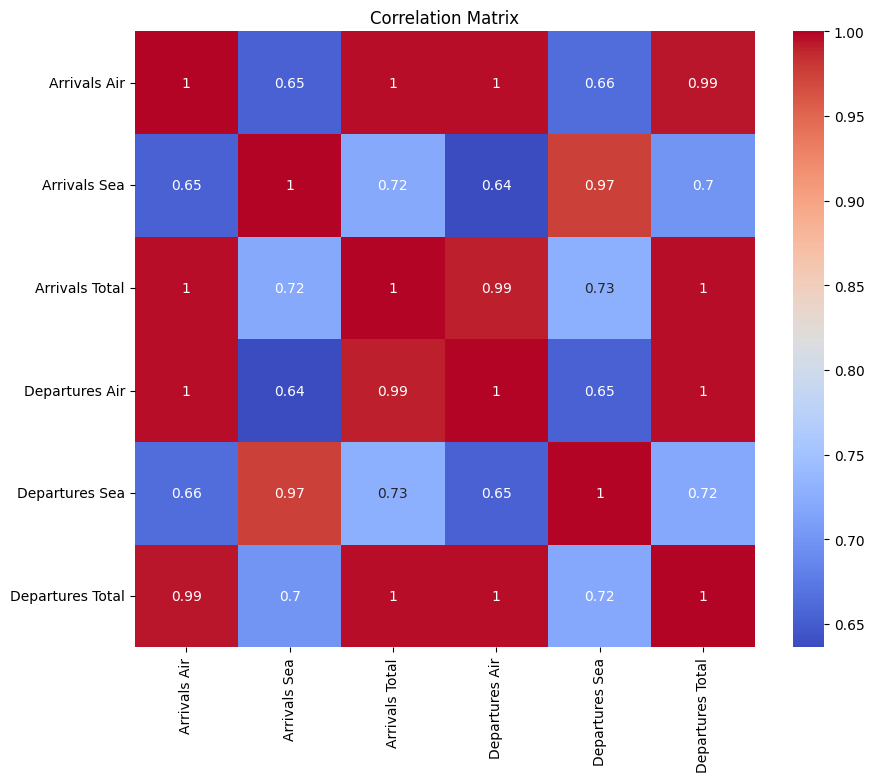

In [707]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivoted.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [708]:
# Creates a grid of scatter plots for each pair of columns
sns.pairplot(df_pivoted)

In [ ]:
#Checking the pivoted dataframe info about data types and nulls count
df_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, 2010-01 to 2024-01
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Arrivals Air      169 non-null    float64
 1   Arrivals Sea      169 non-null    float64
 2   Arrivals Total    169 non-null    float64
 3   Departures Air    169 non-null    float64
 4   Departures Sea    169 non-null    float64
 5   Departures Total  169 non-null    float64
dtypes: float64(6)
memory usage: 13.3+ KB


In [ ]:
#Visualizing Descriptive Analytics rounding on 2 the decimals
df_pivoted.describe().round(2)

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
count,169.00,169.00,169.00,169.00,169.00,169.00
mean,1129.84,97.66,1227.50,1132.35,97.40,1229.76
std,474.69,63.11,518.13,474.85,60.38,516.41
min,12.10,4.00,16.10,12.80,4.90,17.80
25%,846.00,48.90,911.40,836.50,52.30,895.10
50%,1171.70,87.60,1236.60,1178.50,79.80,1256.40
75%,1450.30,122.50,1576.00,1438.70,127.80,1577.60
max,2070.20,279.50,2270.70,2012.40,278.90,2194.30


In [ ]:
# / Calculating the Mean, Median and Mode to see the central tendencies / #

# Considerations

# Trend and Seasonality: 
 
# In time series analysis, it's also important to consider trend and seasonality. 

# These factors can significantly affect your central tendency measures. 
# For example, a steadily increasing trend could make the mean over the entire series less representative of any specific point in time.

# Outliers: Especially with mean calculations, consider the impact of outliers. 

# If your time series data includes extreme values, they could skew the mean.

# How can seen in the described statistics, min values got close to 0




In [ ]:
# Getting Mean Values from each column
mean_df = df_pivoted.mean()

print("\nMean values for: (Thousands)")
print(mean_df)


Mean values for: (Thousands)
Arrivals Air        1129.835503
Arrivals Sea          97.657988
Arrivals Total      1227.495858
Departures Air      1132.353254
Departures Sea        97.401183
Departures Total    1229.757396
dtype: float64


In [ ]:
# Getting Median Values from each column
median_df = df_pivoted.median()

print("\nMedian values for: (Thousands)")
print(median_df)


Median values for: (Thousands)
Arrivals Air        1171.7
Arrivals Sea          87.6
Arrivals Total      1236.6
Departures Air      1178.5
Departures Sea        79.8
Departures Total    1256.4
dtype: float64


In [ ]:
# Getting Mode Value(s) from each column
mode_df = df_pivoted.mode()

#print("\nMode values for: (Thousands)")
mode_df

#mode = df_pivoted['Departures Total'].mode()

#print(mode)

#Too many modes to some columns because its a time series dataframe

,Arrivals Air,Arrivals Sea,Arrivals Total,Departures Air,Departures Sea,Departures Total
0,1646.3,31.3,1214.8,700.5,56.3,17.8
1,NaN,84.3,1235.1,709.5,NaN,36.3
2,NaN,86.8,1523.2,NaN,NaN,53.2
3,NaN,115.3,NaN,NaN,NaN,66.5
4,NaN,119.9,NaN,NaN,NaN,73.0
...,...,...,...,...,...,...
164,NaN,NaN,NaN,NaN,NaN,2116.8
165,NaN,NaN,NaN,NaN,NaN,2177.2
166,NaN,NaN,NaN,NaN,NaN,2183.9
167,NaN,NaN,NaN,NaN,NaN,2191.9


In [ ]:
# In this context:

# The mean will give you the average value of each column, 
# which can be influenced by outliers or very high or low values.

# The median will provide the middle value of the dataset when sorted, 
# offering a better measure of central tendency if your data is skewed.

# The mode will show the most frequently occurring number of arrivals by air.
# If there's only one mode, it indicates a clear peak in your data distribution.

# By comparing these three measures, you can gain insights into the distribution of your "Arrivals Air" data.
# If the mean is significantly higher than the median,
# it might suggest the presence of high outliers affecting the average.

In [ ]:
#Mean, Median and Mode of Arrivals Air

print(f"Mean of Arrivals Air: {mean_df['Arrivals Air']}")
print(f"Median of Arrivals Air: {median_df['Arrivals Air']}")
print(f"Mode(s) of Arrivals Air: {mode_df['Arrivals Air'].dropna().to_list()}")


Mean of Arrivals Air: 1129.83550295858
Median of Arrivals Air: 1171.7
Mode(s) of Arrivals Air: [1646.3]


In [ ]:
#Mean, Median and Mode of Departures Air

print(f"Mean of Departures Air: {mean_df['Departures Air']}")
print(f"Median of Departures Air: {median_df['Departures Air']}")
print(f"Mode(s) of Departures Air: {mode_df['Departures Air'].dropna().to_list()}")


Mean of Departures Air: 1132.3532544378697
Median of Departures Air: 1178.5
Mode(s) of Departures Air: [700.5, 709.5]


In [ ]:
#Mean, Median and Mode of Arrivals Sea

print(f"Mean of Arrivals Sea: {mean_df['Arrivals Sea']}")
print(f"Median of Arrivals Sea: {median_df['Arrivals Sea']}")
print(f"Mode(s) of Arrivals Sea: {mode_df['Arrivals Sea'].dropna().to_list()}")

Mean of Arrivals Sea: 97.65798816568048
Median of Arrivals Sea: 87.6
Mode(s) of Arrivals Sea: [31.3, 84.3, 86.8, 115.3, 119.9]


In [ ]:
#Mean, Median and Mode of Departures Sea

print(f"Mean of Departures Sea: {mean_df['Departures Sea']}")
print(f"Median of Departures Sea: {median_df['Departures Sea']}")
print(f"Mode(s) of Departures Sea: {mode_df['Departures Sea'].dropna().to_list()}")

Mean of Departures Sea: 97.40118343195266
Median of Departures Sea: 79.8
Mode(s) of Departures Sea: [56.3]


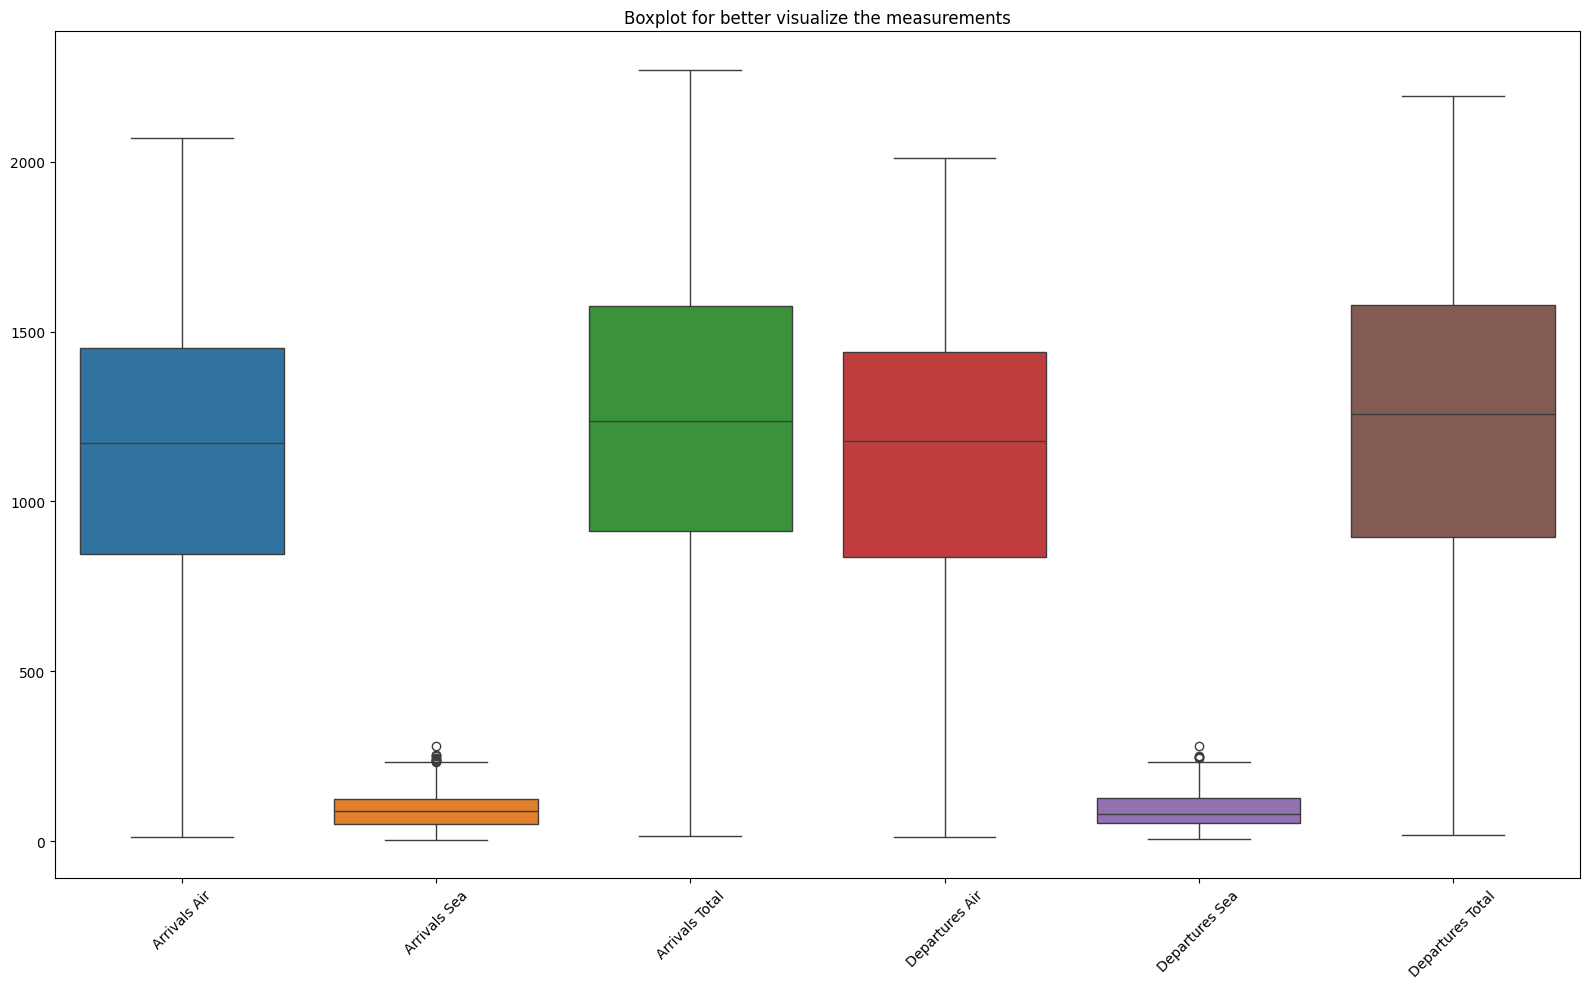

In [ ]:
# Creating a boxplot for each column
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_pivoted)
plt.xticks(rotation=45)
plt.title('Boxplot for better visualize the measurements')
plt.tight_layout()
plt.show()

In [ ]:
# Kernel Density Estimate (KDE) Explained

#KDE is a non-parametric way to estimate the probability density function (PDF) of a random variable. 
#It's smooth and not limited to a specific distribution shape (like normal or binomial distributions).

#KDE works by placing a kernel (a smooth, bell-shaped curve) on each data point and then summing all these kernels to produce a smooth estimate of the data's density function.
#The final curve is a weighted sum of those kernels and gives a smoothed estimate of the dataset's density.

#The bandwidth (bw) parameter controls the width of the kernels and thus the smoothness of the density estimate: 
#a larger bandwidth leads to a smoother curve, 
#while a smaller bandwidth leads to a curve that closely follows the data.

#Handling Multimodal* Distributions

#For datasets with more than one mode, 
#the KDE will show peaks at each mode, depending on the chosen bandwidth. 
#A well-chosen bandwidth can reveal the multimodal nature of the data.

#The KDE does not calculate a normal distribution; 
#rather,it estimates the data's density based on the existing data points. 
#If the data is multimodal, 
#the KDE will reflect those modes in its estimate.

In [ ]:
# Normal Distribution

#Normal distribution, also known as Gaussian distribution, 
#is characterized by a symmetric bell-shaped curve. 
#It is defined by its mean (μ) and standard deviation (σ).
#We can visually check if a numeric column follows a normal distribution by plotting a histogram and comparing it to a normal distribution curve.

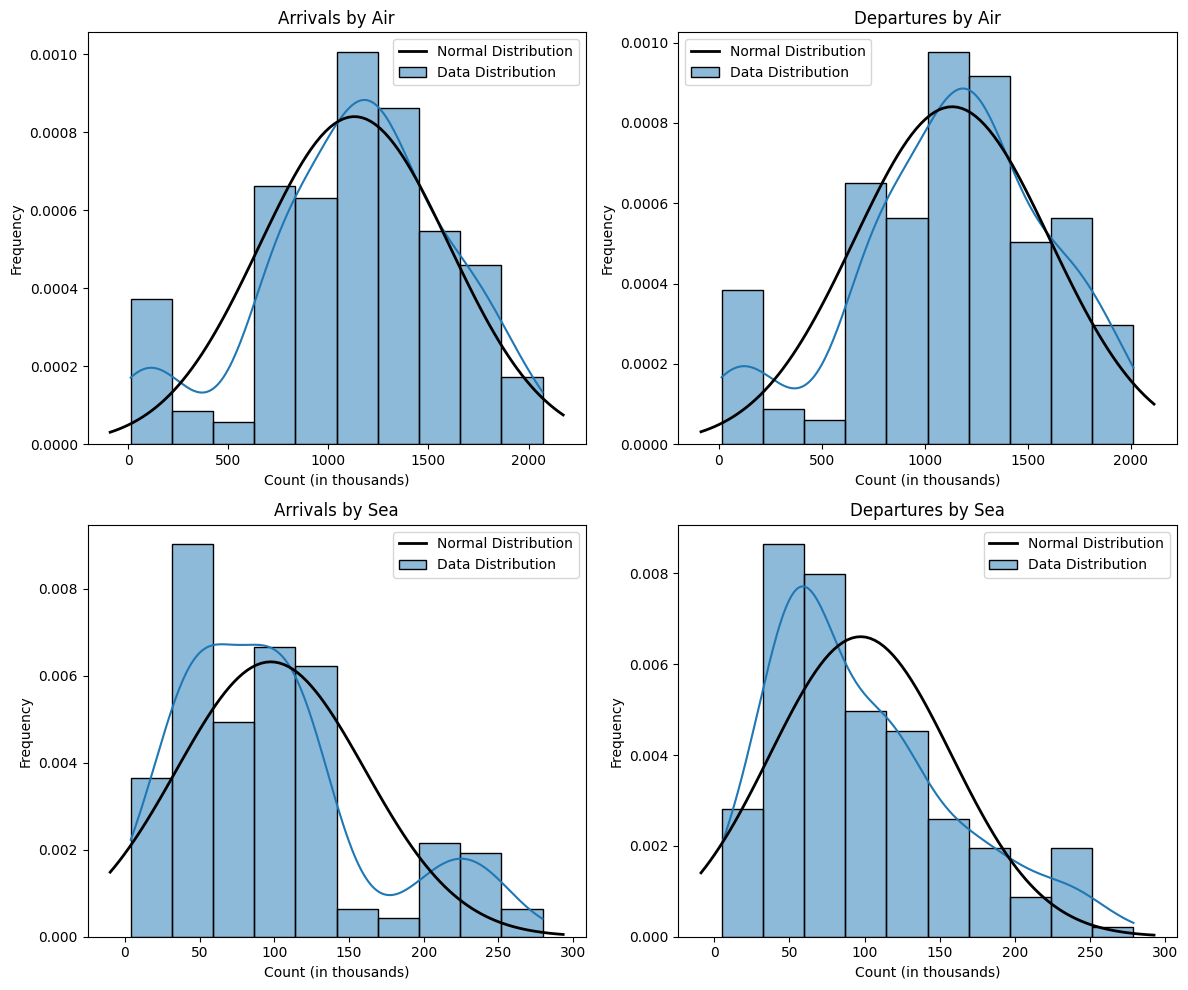

In [ ]:
data_columns = ['Arrivals Air', 'Departures Air', 'Arrivals Sea', 'Departures Sea']
titles = ['Arrivals by Air', 'Departures by Air', 'Arrivals by Sea', 'Departures by Sea']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, column, title in zip(axes, data_columns, titles):
    # Plot histogram with KDE
    sns.histplot (df_pivoted[column], bins=10, kde=True, ax=ax, stat="density", label="Data Distribution")
    
    # Calculate mean and standard deviation from the column
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    
    # Generate points on the x axis
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    
    # Plot the normal distribution curve
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'k', linewidth=2, label="Normal Distribution")
    
    # Set titles and labels, and add legend
    ax.set_title(title)
    ax.set_xlabel('Count (in thousands)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Range

#Range is the difference between the maximum and minimum values.
#Calculating the range for each numeric column provides a simple measure of the spread or variability of the data.
#It helps in understanding the extent of variation present in each feature, 
#providing insights into the overall spread of values and potential outliers.

In [ ]:
# Getting Max Values from each column
max_df = df_pivoted.max()

print("\nMax values for: (Thousands)")
print(max_df)


Max values for: (Thousands)
Arrivals Air        2070.2
Arrivals Sea         279.5
Arrivals Total      2270.7
Departures Air      2012.4
Departures Sea       278.9
Departures Total    2194.3
dtype: float64


In [ ]:
# Getting Min Values from each column
min_df = df_pivoted.min()

print("\nMin values for: (Thousands)")
print(min_df)


Min values for: (Thousands)
Arrivals Air        12.1
Arrivals Sea         4.0
Arrivals Total      16.1
Departures Air      12.8
Departures Sea       4.9
Departures Total    17.8
dtype: float64


In [ ]:
# Calculating the range for each column in df_pivoted
range_df = df_pivoted.max() - df_pivoted.min()

print("\nRange values for: (Thousands)\n")
print(range_df)


Range values for: (Thousands)

Arrivals Air        2058.1
Arrivals Sea         275.5
Arrivals Total      2254.6
Departures Air      1999.6
Departures Sea       274.0
Departures Total    2176.5
dtype: float64


In [ ]:
# Interquartile Range (IQR):

#IQR is the range covered by the middle 50% of the data, 
#calculated as the difference between the third quartile (Q3) and the first quartile (Q1).
#Computing IQR helps in assessing the spread of the central portion of the data distribution, 
#providing a robust measure of variability that is less sensitive to outliers compared to the range.
#It is particularly useful in identifying the presence of outliers and understanding the spread of the bulk of the data within each feature.

In [ ]:
# Calculating the IQR for each column in df_pivoted
Q1 = df_pivoted.quantile(0.25)
Q3 = df_pivoted.quantile(0.75)
IQR = Q3 - Q1

print("\nInter Quartile Range values for: (Thousands)\n")
print(range_df)


Inter Quartile Range values for: (Thousands)

Arrivals Air        2058.1
Arrivals Sea         275.5
Arrivals Total      2254.6
Departures Air      1999.6
Departures Sea       274.0
Departures Total    2176.5
dtype: float64


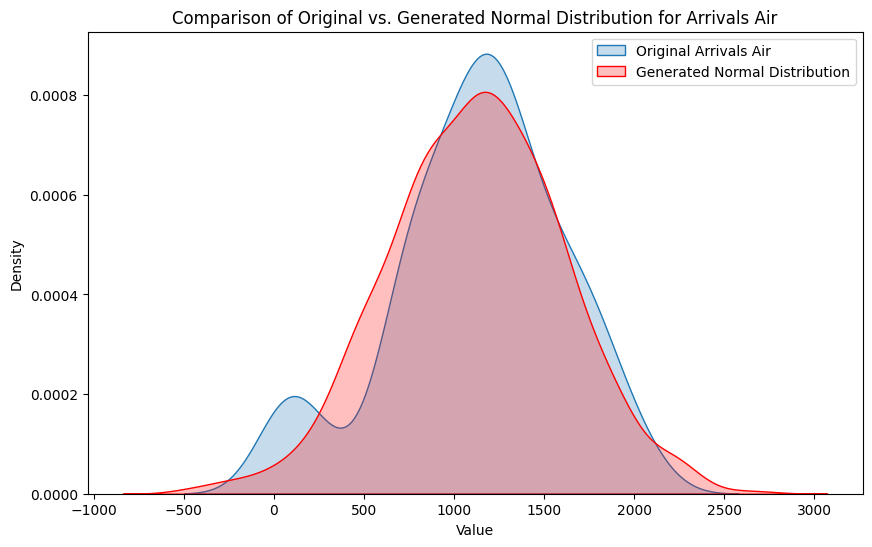

In [ ]:
import numpy as np

# Calculate the mean and standard deviation of the 'Arrivals - Air' column
mean_arrivals_air = df_pivoted['Arrivals Air'].mean()
std_arrivals_air = df_pivoted['Arrivals Air'].std()

# Generate a normally distributed dataset with the same mean and standard deviation
normal_arrivals_air = np.random.normal(loc=mean_arrivals_air, scale=std_arrivals_air, size=1000)

# Example: Plot the original data vs. the generated normal distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(df_pivoted['Arrivals Air'], fill=True, label='Original Arrivals Air')
sns.kdeplot(normal_arrivals_air, fill=True, label='Generated Normal Distribution', color='red')
plt.legend()
plt.title('Comparison of Original vs. Generated Normal Distribution for Arrivals Air')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


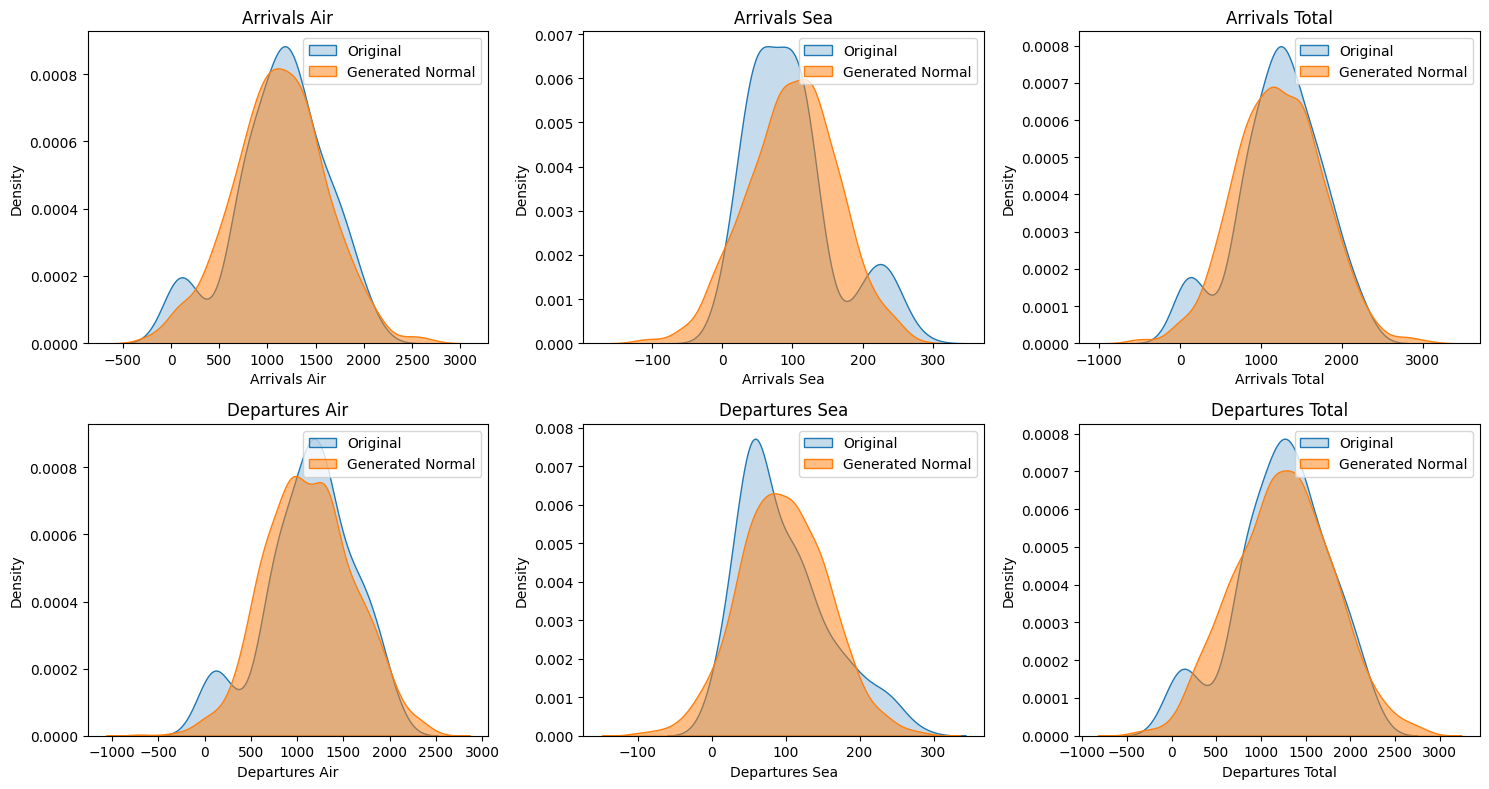

In [ ]:
num_columns = df_pivoted.shape[1]
n_cols = 3  # Number of columns in the plot grid
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original')
    
    # Generated normal distribution data based on the column's mean and std
    mean = df_pivoted[column].mean()
    std = df_pivoted[column].std()
    normal_data = np.random.normal(loc=mean, scale=std, size=1000)
    sns.kdeplot(normal_data, fill=True, label='Generated Normal', alpha=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()

In [ ]:
# n = 10000  # Fixed number of trials for the binomial distribution
# n_cols = 3  # Number of columns in the plot grid
# num_columns = df_pivoted.shape[1]
# n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

# plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

# for i, column in enumerate(df_pivoted.columns, 1):
# plt.subplot(n_rows, n_cols, i)
    
# Original data KDE
# sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
# Approximating 'p' for binomial distribution
# mean = df_pivoted[column].mean()
# p = mean / n  # Simplified approximation, assuming the mean can directly translate to success probability
    
# Adjust 'p' to not exceed 1 in cases where this method oversimplifies
# p = min(p, 1)
    
# Generated binomial distribution data
# binomial_data = np.random.binomial(n, p, size=1000)
# sns.kdeplot(binomial_data, fill=True, label='Generated Binomial', alpha=0.5)
    
# plt.title(column)
# plt.legend()
# plt.tight_layout()

#plt.show()

In [ ]:
#Poisson Distribution:

#Calculate the Mean Rate (λ): The key parameter of the Poisson distribution, 
#λ (lambda), is the average rate of events per interval.

#Poisson probability mass function (PMF) for a range of counts to compare the theoretical distribution with your data.

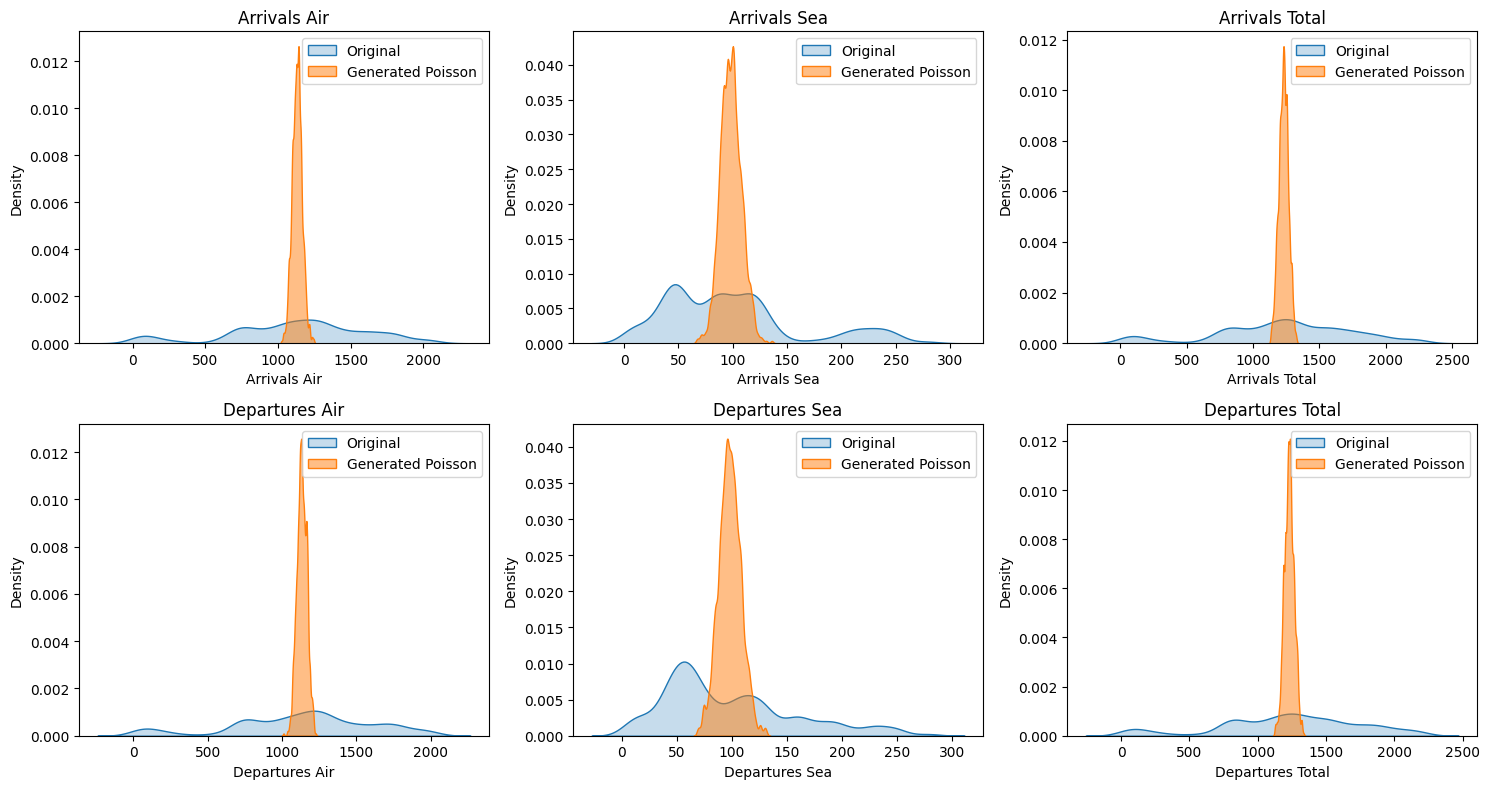

In [ ]:
n_cols = 3  # Number of columns in the plot grid
num_columns = df_pivoted.shape[1]
n_rows = (num_columns + n_cols - 1) // n_cols  # Calculate required number of rows

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust figure size as needed

for i, column in enumerate(df_pivoted.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Original data KDE
    sns.kdeplot(df_pivoted[column], fill=True, label='Original', bw_adjust=0.5)
    
    # Calculate lambda (mean) for the Poisson distribution from the original data
    lambda_param = df_pivoted[column].mean()
    
    # Generated Poisson distribution data based on the column's mean
    poisson_data = np.random.poisson(lam=lambda_param, size=1000)
    sns.kdeplot(poisson_data, fill=True, label='Generated Poisson', alpha=0.5, bw_adjust=0.5)
    
    plt.title(column)
    plt.legend()
    plt.tight_layout()

plt.show()